# pcqc demo
Principal Component Quality Control

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pcqc import *

/opt/conda/lib/python3.7/site-packages/anndata/_core/https://urldefense.proofpoint.com/v2/url?u=http-3A__anndata.py&d=DwIGaQ&c=shNJtf5dKgNcPZ6Yh64b-A&r=IRDkiz1FUo8bq20_WGVGusufh90RFvNCmCrPdmmYjWY&m=uGiXPQOkrkWErmRglsq0KaCdIbSuUCyspvhvfMFscYo&s=OWjd7ZEzGRiNheRLGrnuch4fg0PkhvIYNUPpIleJFVo&e= :21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


### Load Data

In [2]:
cbmc_df = pd.read_csv('filtered_cmbc_assay.csv')
cbmc_df.index = cbmc_df['Unnamed: 0']
cbmc_df.drop(columns = 'Unnamed: 0',inplace = True)
cbmc_df = cbmc_df.transpose()
cbmc_df.head()

Unnamed: 0,A4GALT,ABCB10,ABCC3,ABCG2,ABI3,AC002454.1,AC004381.6,AC004791.2,AC005339.2,AC005356.1,...,MOUSE-Rtn4,MOUSE-Ppp1ca,MOUSE-Cald1,MOUSE-Rps26,MOUSE-Ctsl,MOUSE-Tnfrsf12a,MOUSE-Esd,MOUSE-Acta2,MOUSE-Arpc2,MOUSE-Calr
CTGTTTACACCGCTAG,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.666522,2.806501,4.390655,2.338495,4.236169,3.291269,3.338256,1.181500,3.575336,2.491014
CTCTACGGTGTGGCTC,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.431149,3.219714,3.572171,3.176395,3.501385,3.099354,3.375631,3.738814,3.165883,2.803176
AGCAGCCAGGCTCATT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.810213,3.309678,3.658060,3.236889,3.957931,3.465798,2.787275,2.762576,3.510315,3.762173
GAATAAGAGATCCCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.686728,3.248412,3.565898,3.485953,3.325856,2.842990,3.483046,2.815389,3.319044,4.037947
GTGCATAGTCATGCAT,-0.043005,-0.127965,-0.089527,-0.044218,-0.31871,-0.077685,-0.067245,-0.026909,-0.020008,-0.02334,...,3.561990,3.678177,4.183636,3.325419,2.450436,2.636636,1.886444,6.334562,3.971224,2.929176


### Create PC Cluster Object and Fit It

In [3]:
pca = PC_Cluster(n_pcs = 100)
pca.fit(cbmc_df.values)
pca.norm_eigenvalues[0:20]

array([0.06562919, 0.03916874, 0.02691411, 0.01778673, 0.01531372,
       0.01340929, 0.01227411, 0.0069056 , 0.00643235, 0.00514619,
       0.00342394, 0.00324247, 0.00302587, 0.00232158, 0.00222412,
       0.00214154, 0.001905  , 0.00181226, 0.00176268, 0.00166096])

### Compute Distribution of Variance Explained for Each Principal Component

In [4]:
pca.pc_distribution()
pca.df_pca_dist.head()

,PC_Dist_0,PC_Dist_1,PC_Dist_2,PC_Dist_3,PC_Dist_4,PC_Dist_5,PC_Dist_6,PC_Dist_7,PC_Dist_8,PC_Dist_9,...,PC_Dist_90,PC_Dist_91,PC_Dist_92,PC_Dist_93,PC_Dist_94,PC_Dist_95,PC_Dist_96,PC_Dist_97,PC_Dist_98,PC_Dist_99
0,0.000109,1.017151e-06,3.472080e-08,1.432048e-08,5.050533e-09,1.319299e-07,4.266750e-08,2.720950e-08,2.365754e-10,3.106800e-08,...,2.198981e-09,1.751499e-08,2.922613e-11,2.244439e-09,5.922574e-09,1.228976e-08,4.705107e-09,1.509249e-09,1.960247e-09,2.843155e-09
1,0.000106,1.330582e-06,4.509797e-07,9.829682e-10,4.407147e-08,1.592044e-06,2.385236e-07,3.358053e-08,5.075646e-09,1.728385e-08,...,9.969644e-10,2.087265e-09,8.196951e-09,2.109240e-09,4.168864e-08,2.796389e-08,5.889346e-11,5.691022e-09,1.084981e-09,4.350326e-09
2,0.000112,1.352623e-06,2.310197e-07,2.536909e-08,2.595612e-08,3.811017e-07,1.088577e-10,1.922921e-08,3.803947e-08,2.003366e-09,...,2.840543e-09,2.023886e-08,1.010993e-12,2.542236e-08,3.257220e-09,9.102833e-09,4.732683e-08,1.206457e-08,1.393310e-10,4.298715e-09
3,0.000108,1.341827e-06,1.159750e-07,2.082525e-08,2.928377e-08,4.010636e-07,3.102027e-10,6.158710e-09,1.380496e-10,7.409330e-13,...,1.377265e-08,3.063582e-10,5.103592e-09,2.295113e-09,9.564528e-09,4.424484e-10,3.092323e-09,7.237929e-09,1.433666e-08,2.075092e-10
4,0.000102,9.337392e-07,2.459761e-07,2.138715e-10,6.602527e-08,2.070620e-07,1.215814e-10,2.952202e-09,2.365325e-08,2.340283e-08,...,2.689249e-10,4.261099e-09,5.340679e-09,1.173059e-08,2.289973e-08,2.751366e-09,2.644236e-08,4.734207e-08,2.013404e-09,4.568171e-09


### Plot these Distributions

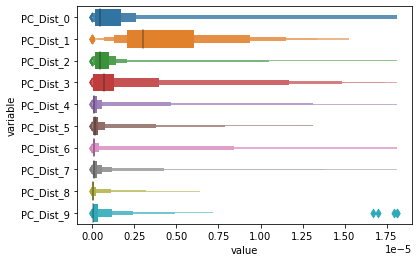

In [5]:
pc_distplot(pca, cols = np.arange(0,10))

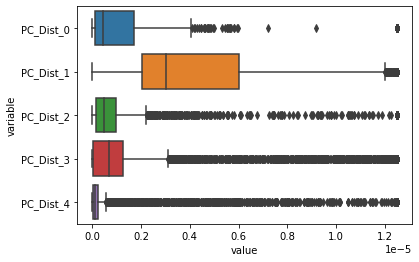

In [6]:
pc_distplot(pca, upper_limit = 1.25e-5, my_function = sns.boxplot)

### Save Plots for All 100 PC Distributions to a pdf

In [7]:
pc_distplot_pdf('pcqc_100_dist.pdf',pca)

### Compute Stats from these Distributions

In [8]:
pca.pc_stats()

In [9]:
pca.df_pc_stats.head()

,85.0_Percentile,90.0_Percentile,95.0_Percentile,evalue,rank
PC_Dist_0,2.311926e-06,2.936726e-06,0.000097,0.065629,1.0
PC_Dist_1,8.601626e-06,1.014885e-05,0.000012,0.039169,2.0
PC_Dist_2,1.285693e-06,1.547341e-06,0.000003,0.026914,3.0
PC_Dist_3,2.813921e-06,7.694347e-06,0.000013,0.017787,4.0
PC_Dist_4,4.296442e-07,9.569372e-07,0.000006,0.015314,5.0


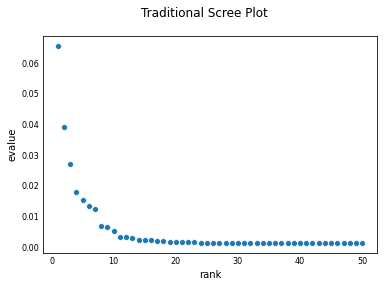

In [10]:
scatter_scree_plot(pca)

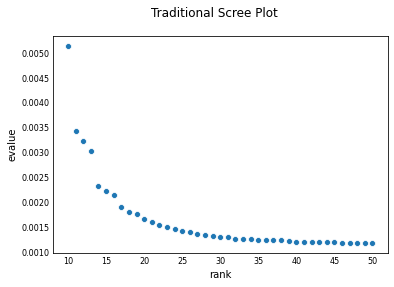

In [11]:
scatter_scree_plot(pca, rank = np.arange(10,51))

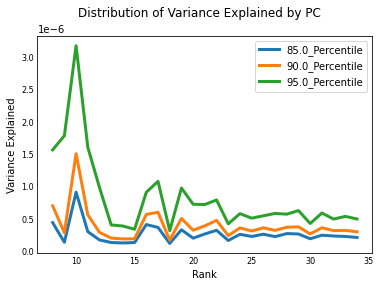

In [12]:
fig = dist_var_pc_plot(pca, rank = np.arange(8,35))

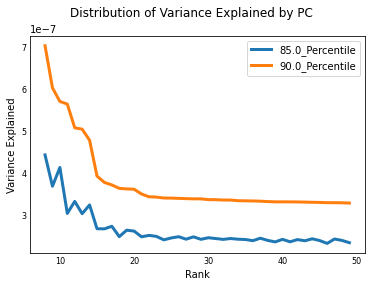

In [13]:
fig = sorted_dist_var_pc_plot(pca, rank = np.arange(8,50), sort_var = '90.0_Percentile', max_subset_size = 2)

In [14]:
pca.select_top_pcs(criteria = '90.0_Percentile', n_top_pcs = 20)

In [15]:
reduced_matrix = pca.use_top_pcs()

In [16]:
reduced_matrix.shape

(8617, 20)